In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import svm, preprocessing
from sklearn import datasets
from numpy import array


%matplotlib inline

In [8]:
s1 = 22
s2 = 15.6
s3 = 8.7
azs1 = 77.4
azs2 = 158.3
azs3 = 42.8
Is1 = -28.8
Is2 = 16.1
Is3 = 56.2

bx = 90 - azs1
gx = Is1

by = 90 - azs2
gy = Is2

bz = 90 - azs3
gz = Is3


lx = math.cos(math.radians(bx))*math.cos(math.radians(gx))
mx = math.cos(math.radians(gx))*math.sin(math.radians(bx))
nx = math.sin(math.radians(gx))

ly = math.cos(math.radians(by))*math.cos(math.radians(gy))
my = math.cos(math.radians(gy))*math.sin(math.radians(by))
ny = math.sin(math.radians(gy))

lz = math.cos(math.radians(bz))*math.cos(math.radians(gz))
mz = math.cos(math.radians(gz))*math.sin(math.radians(bz))
nz = math.sin(math.radians(gz))


In [9]:
L = np.array([[lx, mx, nx], [ly, my, ny], [lz, mz, nz]])

LT = L.T

S123 = np.array([[s1, 0, 0], [0, s2, 0], [0, 0, s3]])

MultLS = np.dot(S123,L)
SXYZ = np.dot(LT,MultLS)

print(SXYZ)

print(SXYZ[0,2])

[[ 1.93017636e+01 -8.35316598e-03 -4.79454296e+00]
 [-8.35316598e-03  1.46849817e+01 -2.93701123e+00]
 [-4.79454296e+00 -2.93701123e+00  1.23132547e+01]]
-4.794542961218841


In [10]:
APPFINAL =[]
APPFINAL.clear()
APPFINAL2 =[]
APPFINAL2.clear()


for i in range(0, 360, 10):
    
    ROTAREJEX = i
    ROTAREJEZ = 0

    bxprim = ROTAREJEX
    gxprim = 0

    byprim = 90 + ROTAREJEX
    gyprim = 0

    bzprim = ROTAREJEX - 90
    gzprim = 90
    
    lxprim = math.cos(math.radians(bxprim))*math.cos(math.radians(gxprim))
    mxprim = math.cos(math.radians(gxprim))*math.sin(math.radians(bxprim))
    nxprim = math.sin(math.radians(gxprim))

    lyprim = math.cos(math.radians(byprim))*math.cos(math.radians(gyprim))
    myprim = math.cos(math.radians(gyprim))*math.sin(math.radians(byprim))
    nyprim = math.sin(math.radians(gyprim))

    lzprim = math.cos(math.radians(bzprim))*math.cos(math.radians(gzprim))
    mzprim = math.cos(math.radians(gzprim))*math.sin(math.radians(bzprim))
    nzprim = math.sin(math.radians(gzprim))

    Lprim = np.array([[lxprim, mxprim, nxprim], [lyprim, myprim, nyprim], [lzprim, mzprim, nzprim]])
    LTprim = Lprim.T
    MultLSprim = np.dot(SXYZ,LTprim)
    SXYZprim = np.dot(Lprim,MultLSprim)
    
    S1P = 0.5*(SXYZprim[2,2] + SXYZprim[1,1]) + math.sqrt(0.25*(pow((SXYZprim[1,1] - SXYZprim[2,2]),2)) + pow(SXYZprim[1,2],2))
    S3Q = 0.5*(SXYZprim[2,2] + SXYZprim[1,1]) - math.sqrt(0.25*(pow((SXYZprim[1,1] - SXYZprim[2,2]),2)) + pow(SXYZprim[1,2],2))
    RAZONPQ = S1P/S3Q
    
    if i == 90:
        s1inicial = S1P
        s3inicial = S3Q
        razoninicial = s1inicial/s3inicial
    
    ANGULO = -(i - 90)
    if ANGULO < 0:
        ANGULO = 360 + ANGULO
    
    APPFINAL.append([math.radians(ANGULO), RAZONPQ])
    
APPFINAL2.append([0, razoninicial])
nuevo = pd.DataFrame(APPFINAL2, columns =['ANGULO', 'Ratio P/Q'])

PLOTPQ = pd.DataFrame(APPFINAL, columns =['ANGULO', 'Ratio P/Q'])
PLOTPQO = PLOTPQ.sort_values(by=['ANGULO'])
PLOTPQO = PLOTPQO.reset_index(drop=True)

PLOTPQO = PLOTPQO.append(nuevo)

PLOTPQO.head()

,ANGULO,Ratio P/Q
0,0.000000,2.201597
1,0.174533,2.053182
2,0.349066,1.883427
3,0.523599,1.704058
4,0.698132,1.529076


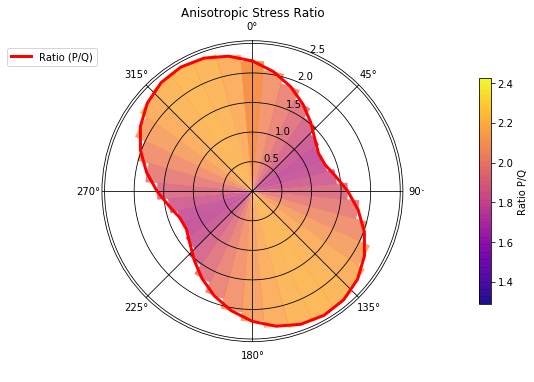

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6, 6))

# Ahora, creamos una gridspec structure
gs = gridspec.GridSpec(1,3, height_ratios=[1], width_ratios=[4,0.1,1])
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

ax1 = plt.subplot(gs[0,0],projection='polar') # place it where it should be.



ax1.plot(PLOTPQO['ANGULO'], PLOTPQO['Ratio P/Q'], color='r', linewidth=3, label = 'Ratio (P/Q)')

colors = plt.cm.plasma(PLOTPQO['Ratio P/Q']/ 3)
ax1.bar(PLOTPQO['ANGULO'], PLOTPQO['Ratio P/Q'], width=0.18, bottom=0.0, color=colors, alpha=0.8)

ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.grid(True, color='k',linestyle='-') 
ax1.legend(loc="lower right", bbox_to_anchor=(0, 0.9))

ax2 = plt.subplot(gs[0,2])
PLOTPQO.plot(kind='scatter', x='ANGULO',  y='Ratio P/Q', c='Ratio P/Q', s=100, cmap="plasma", alpha=0.8,
             ax=ax2, colorbar=True)
PLOTPQO.plot(kind='scatter', x='ANGULO',  y='Ratio P/Q', c='white', s=200, alpha=1,
             ax=ax2, colorbar=False)

ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xlabel(r' ')
ax2.set_ylabel(r' ')
ax2.axis('off')
ax1.set_title("Anisotropic Stress Ratio", va='bottom') 
plt.show()

In [14]:
clasificar_j = pd.read_csv('STRESSXYZ.csv', delimiter = ',') ## Import the dataset
print(clasificar_j.columns)


clasificar_j.head()

Index(['SXX', 'SYY', 'SZZ', 'SXY', 'SXZ', 'SYZ', 'S1', 'S1AZ', 'S1IN', 'S2',
       'S2AZ', 'S2IN', 'S3', 'S3AZ', 'S3IN', 'AZIMUTHXYZ'],
      dtype='object')


,SXX,SYY,SZZ,SXY,SXZ,SYZ,S1,S1AZ,S1IN,S2,S2AZ,S2IN,S3,S3AZ,S3IN,AZIMUTHXYZ
0,19.28,14.673333,12.293333,-0.023333,-4.806667,-2.93,22,120,30,11,26,21,10,266,52,0
1,19.28,14.673333,12.293333,-0.023333,-4.806667,-2.93,22,120,30,11,26,21,10,266,52,90


In [15]:
STRESSPLANO =[]
STRESSPLANO.clear()

for i in range(len(clasificar_j['SXX'])):

    sxx = clasificar_j['SXX'][i]
    syy = clasificar_j['SYY'][i]
    szz = clasificar_j['SZZ'][i]
    sxy = clasificar_j['SXY'][i]
    sxz = clasificar_j['SXZ'][i]
    syz = clasificar_j['SYZ'][i]

    SXYZ_J = np.array([[sxx, sxy, sxz], [sxy, syy, syz], [sxz, syz, szz]])
    
    if 0 <= clasificar_j['AZIMUTHXYZ'][i] <= 90:
    
        AZIMUTHJ = 90 - clasificar_j['AZIMUTHXYZ'][i]
        
    if clasificar_j['AZIMUTHXYZ'][i] > 90:
    
        AZIMUTHJ = 90 - clasificar_j['AZIMUTHXYZ'][i]

    ROTAREJEX = AZIMUTHJ
    ROTAREJEZ = 0

    bxprim = ROTAREJEX
    gxprim = 0

    byprim = 90 + ROTAREJEX
    gyprim = 0

    bzprim = ROTAREJEX - 90
    gzprim = 90
    
    lxprim = math.cos(math.radians(bxprim))*math.cos(math.radians(gxprim))
    mxprim = math.cos(math.radians(gxprim))*math.sin(math.radians(bxprim))
    nxprim = math.sin(math.radians(gxprim))

    lyprim = math.cos(math.radians(byprim))*math.cos(math.radians(gyprim))
    myprim = math.cos(math.radians(gyprim))*math.sin(math.radians(byprim))
    nyprim = math.sin(math.radians(gyprim))

    lzprim = math.cos(math.radians(bzprim))*math.cos(math.radians(gzprim))
    mzprim = math.cos(math.radians(gzprim))*math.sin(math.radians(bzprim))
    nzprim = math.sin(math.radians(gzprim))

    Lprim = np.array([[lxprim, mxprim, nxprim], [lyprim, myprim, nyprim], [lzprim, mzprim, nzprim]])
    LTprim = Lprim.T
    MultLSprim = np.dot(SXYZ_J,LTprim)
    SXYZprim = np.dot(Lprim,MultLSprim)
    
    S1P = 0.5*(SXYZprim[2,2] + SXYZprim[1,1]) + math.sqrt(0.25*(pow((SXYZprim[1,1] - SXYZprim[2,2]),2)) + pow(SXYZprim[1,2],2))
    S3Q = 0.5*(SXYZprim[2,2] + SXYZprim[1,1]) - math.sqrt(0.25*(pow((SXYZprim[1,1] - SXYZprim[2,2]),2)) + pow(SXYZprim[1,2],2))
    SPERPENDICULAR = SXYZprim[0,0]
    ANGULOS1P = math.degrees(math.atan(SXYZprim[1,2]/(S1P - SXYZprim[2,2])))
    
    TETAP = 3*S1P - S3Q
    STRESSPLANO.append([clasificar_j['AZIMUTHXYZ'][i], S1P, S3Q, SPERPENDICULAR, ANGULOS1P, TETAP])
    
TABLESTRESS = pd.DataFrame(STRESSPLANO, columns =['Azimuth', 'S1P', 'S3Q', 'S Perp.', 'Angulo S1', 'Teta'])

TABLESTRESS.head(25)

,Azimuth,S1P,S3Q,S Perp.,Angulo S1,Teta
0,0,21.728672,9.844662,14.673333,26.995766,55.341353
1,90,16.645769,10.320898,19.280000,-33.947899,39.616410
